__Importing important libraries__

In [136]:
import jovian
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
projectname = 'data_science_project_on_netflix_shows'

__==> Loading the dataset__

In [138]:
netflix_dataset = pd.read_csv('./archive/netflix_titles.csv')
netflix_dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


__==> Getting some basic information__

In [139]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [140]:
netflix_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

__==> Dropping some unnecessary columns__

In [141]:
netflix_dataset_copy = netflix_dataset.copy()
netflix_dataset_copy.drop(['show_id', 'description', 'title'], axis=1, inplace=True)

In [142]:
netflix_dataset_copy

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies
...,...,...,...,...,...,...,...,...,...
6229,TV Show,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6230,TV Show,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
6231,Movie,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies
6232,TV Show,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"


In [143]:
netflix_dataset_copy.nunique()

type               2
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
dtype: int64

In [144]:
jovian.commit(project=projectname)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nabindangi32/data-science-project-on-netflix-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows


'https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows'

# Presenting the data through visualization

__==> Pie chart showing the percentage movies and tv shows airing on netflix__

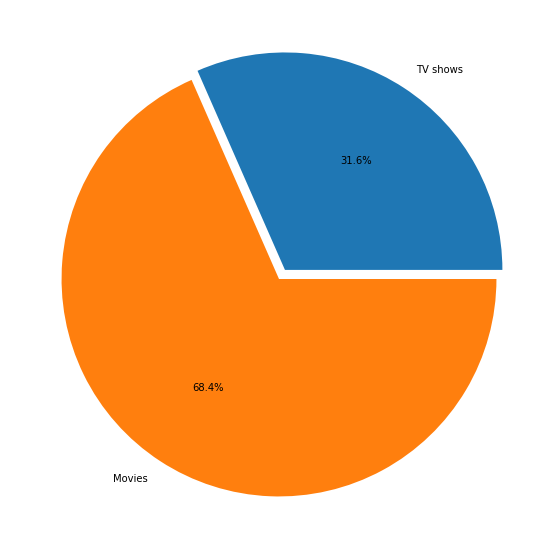

In [145]:
type_col = netflix_dataset_copy['type']
type_list = [0, 0]
type_labels = ['TV shows', 'Movies']
for m_type in type_col:
    if m_type == 'TV Show':
        type_list[0] += 1
    else:
        type_list[1] += 1
plt.figure(figsize=(10, 10))
plt.pie(type_list, labels=type_labels, explode=(0.05, 0), autopct='%1.1f%%');

The above pie diagram shows us that 31.6% of total shows are tv shows and remaining of them rae movies.

__==> Number of movies and tv shows released in netflix from 1995 onward__

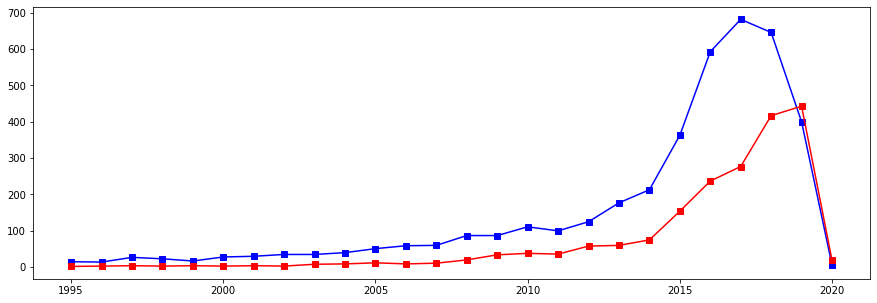

In [146]:
release_year_type_df = netflix_dataset_copy[['release_year', 'type']].sort_values(by='release_year');
release_year_type_df = release_year_type_df[release_year_type_df.release_year >= 1995]

plt.rcParams["figure.figsize"] = (15, 5)
tabs = pd.crosstab(release_year_type_df['release_year'],release_year_type_df['type'])

plt.plot(tabs.index, tabs['Movie'], marker='s', c='b', ls='-');
plt.plot(tabs.index, tabs['TV Show'], marker='s', c='r', ls='-');

The above diagram shows that the number of shows and movies being aired have grown by years

__==> plotting the number of movies in each month__

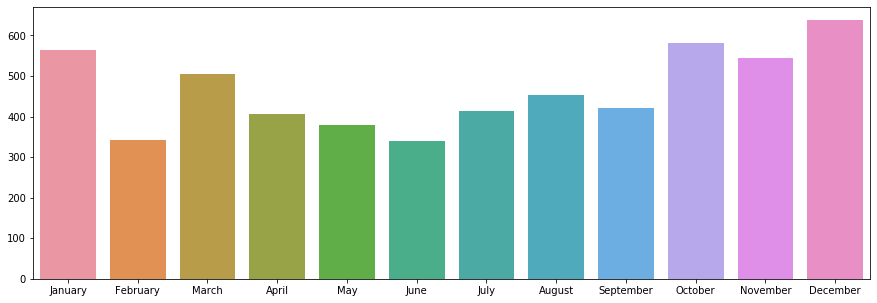

In [147]:
# Removing the nan values in date_added coulumn
date_df = netflix_dataset_copy['date_added'].dropna()

#Counting the number movies released in each of the 12 month rather than the full date.
date_dict = {
    'January'  :0,
    'February' :0,
    'March'    :0,
    'April'    :0,
    'May'      :0,
    'June'     :0,
    'July'     :0, 
    'August'   :0,
    'September':0,
    'October'  :0, 
    'November' :0,
    'December' :0
}
for date in date_df:
    i = date.split(" ")[0]
    if i in date_dict.keys():
        date_dict[i] += 1
        
#Bar plot 
plt.figure(figsize=(15, 5))
sns.barplot(x=list(date_dict.keys()), y=list(date_dict.values()));     

__==> Distribution plot of the duration of movies in minutes__ 

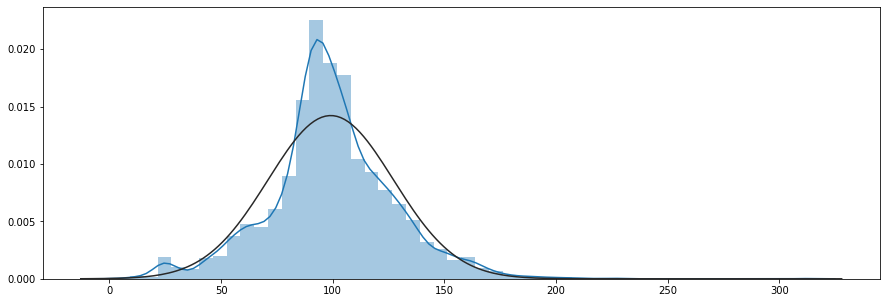

In [148]:
duration_series = netflix_dataset_copy['duration'].dropna()
duration_list = list()
season_list = list()
for duration in duration_series:
    val, measure = duration.split(' ')
    if measure == 'min':
        duration_list.append(int(val))
    else:
        season_list.append(int(val))
        
plt.figure(figsize=(15, 5))
sns.distplot(duration_list, fit=norm);

__==> Bar plot of number of shows with most seasons__

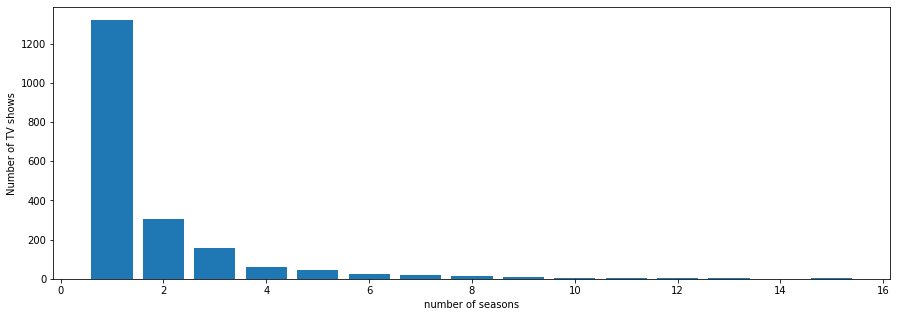

In [149]:
season_dict = {i:season_list.count(i) for i in season_list}
plt.figure(figsize=(15, 5))
plt.bar(x=list(season_dict.keys()), height=list(season_dict.values()));
plt.xlabel('number of seasons');
plt.ylabel('Number of TV shows');

__==> Bar plot of number of shows with their ratings__

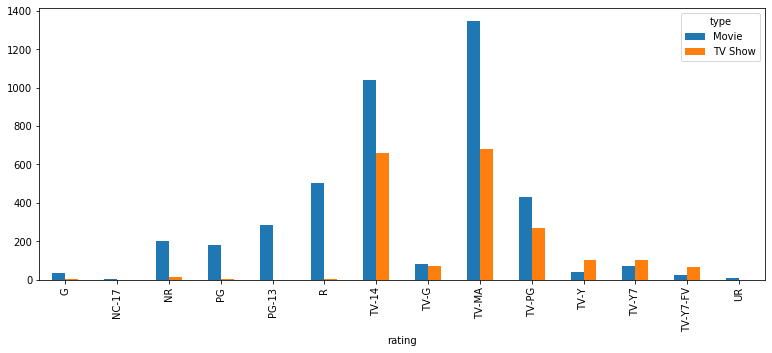

In [150]:
release_year_type_df = netflix_dataset_copy[['rating', 'type']].sort_values(by='rating')
plt.rcParams["figure.figsize"] = (13, 5)
pd.crosstab(release_year_type_df['rating'],release_year_type_df['type']).plot.bar();

In [151]:
# This function is used to seperate the dataframe values if one row of a column has more than one. And returns a 
# dict of their total count in passed dataframe
def seperate_the_df_val(df):
    unique_dict = dict()
    for df_val in df:
        df_type = df_val.split(',')
        for val_type in df_type:
            if val_type not in unique_dict:
                unique_dict[val_type] = 0
            else:
                unique_dict[val_type] += 1
    return unique_dict

__==> Plitting of number of shows airing in netflix in different genre.__

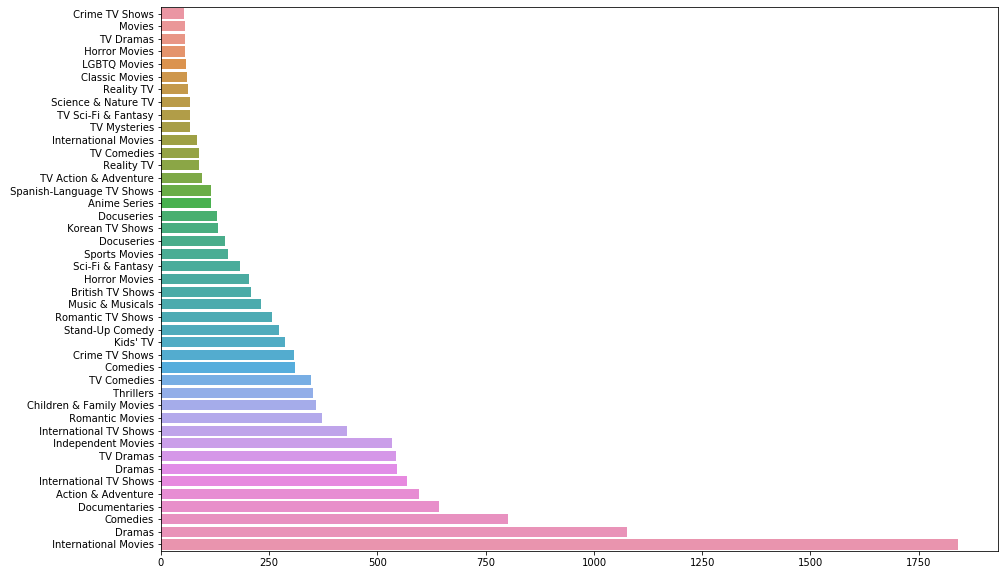

In [152]:

"""unique_list_dict = dict()
for listed_in in listed_df:
    listed_type = listed_in.split(',')
    for l_type in listed_type:
        if l_type not in unique_list_dict:
            unique_list_dict[l_type] = 0
        else:
            unique_list_dict[l_type] += 1"""
listed_df = netflix_dataset_copy['listed_in']
unique_list_dict = seperate_the_df_val(listed_df)
listed_dict = dict()
for key, value in unique_list_dict.items():
    if value >= 50:
        listed_dict[key] = value

listed_dict = {k: v for k, v in sorted(listed_dict.items(), key=lambda item: item[1])} 

plt.figure(figsize=(15, 10))
sns.barplot(x=list(listed_dict.values()), y=list(listed_dict.keys()));

__==> Bar plot of numbers of shows in different countries__

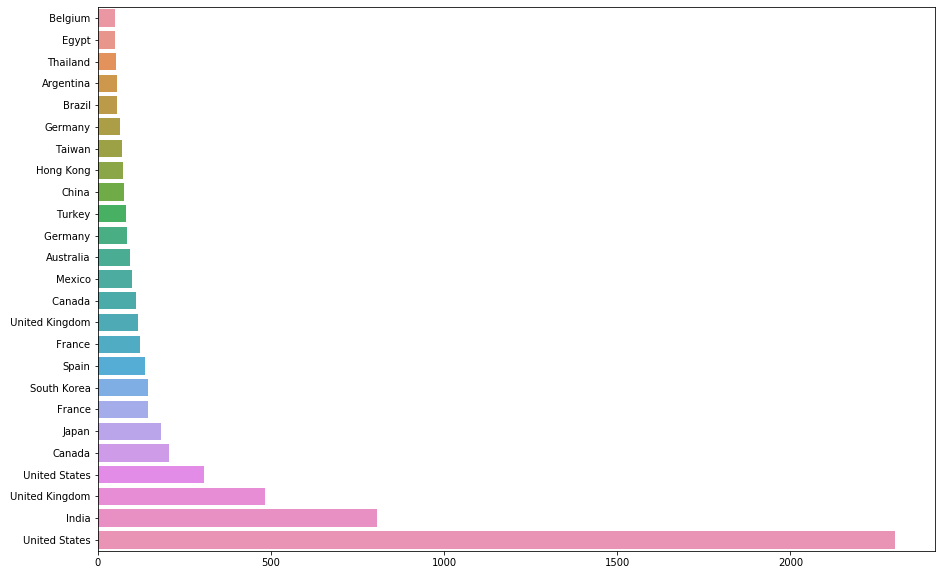

In [153]:
country_df = netflix_dataset_copy['country'].dropna()
country_list_dict = seperate_the_df_val(country_df)
country_dict = dict()
for key, value in country_list_dict.items():
    if value >= 50:
        country_dict[key] = value

country_dict = {k: v for k, v in sorted(country_dict.items(), key=lambda item: item[1])} 

plt.figure(figsize=(15, 10))
sns.barplot(x=list(country_dict.values()), y=list(country_dict.keys()));

In [154]:
jovian.commit(project=projectname)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nabindangi32/data-science-project-on-netflix-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows


'https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows'

#  Asking some questions

## What is the total numbers of movies and shows aired?

In [155]:
seperate_the_df_val(netflix_dataset_copy['type'])

{'Movie': 4264, 'TV Show': 1968}

## What is the average runtime of movies?

In [156]:
print("The average runtime of the movies in netflix is {}".format(sum(duration_list)//len(duration_list)))

The average runtime of the movies in netflix is 99


## Which year has the highest number of shows and movies aired?

In [157]:
movie_val = tabs['Movie'].max()
tv_show_val = tabs['TV Show'].max()

In [158]:
print('Highest number of movies were released in the year {}.\nThe hightst number of TV shows were released in the year {}.'
      .format(int(tabs[tabs["Movie"] == movie_val].index.values),  int(tabs[tabs["TV Show"] == tv_show_val].index.values)))

Highest number of movies were released in the year 2017.
The hightst number of TV shows were released in the year 2019.


## List 10 oldest and latest netflix TV shows and movies.

__==> Oldest TV shows__

In [159]:
tv_shows_df = netflix_dataset[['release_year', 'title', 'type']].sort_values(by='release_year')
tv_shows_df = tv_shows_df[tv_shows_df['type'] != 'Movie']
tv_shows_df.head(10)

,release_year,title,type
4292,1925,Pioneers: First Women Filmmakers*,TV Show
4079,1946,Pioneers of African-American Cinema,TV Show
5981,1963,The Twilight Zone (Original Series),TV Show
5980,1967,The Andy Griffith Show,TV Show
5704,1968,Star Trek,TV Show
614,1972,Monty Python's Fliegender Zirkus,TV Show
5669,1974,Monty Python's Flying Circus,TV Show
5830,1977,Dad's Army,TV Show
4273,1979,El Chavo,TV Show
4369,1981,Ninja Hattori,TV Show


__==> Latest TV shows__

In [160]:
tv_shows_df[::-1].head(10)

,release_year,title,type
3464,2020,AJ and the Queen,TV Show
3379,2020,Killer Inside: The Mind of Aaron Hernandez,TV Show
1315,2020,Maradona in Mexico,TV Show
3189,2020,Cheer,TV Show
3354,2020,Nailed It! Germany,TV Show
3353,2020,Ares,TV Show
3541,2020,Messiah,TV Show
3220,2020,Dracula,TV Show
3221,2020,Go! Go! Cory Carson,TV Show
3546,2020,"Nisman: The Prosecutor, the President, and the...",TV Show


__==> Oldest movies__

In [161]:
movie_shows_df = netflix_dataset[['release_year', 'title', 'type']].sort_values(by='release_year')
movie_shows_df = movie_shows_df[movie_shows_df['type'] != 'TV Show']
movie_shows_df.head(10)

,release_year,title,type
2011,1942,Prelude to War,Movie
2013,1942,The Battle of Midway,Movie
2022,1943,Undercover: How to Operate Behind Enemy Lines,Movie
2023,1943,Why We Fight: The Battle of Russia,Movie
2026,1943,WWII: Report from the Aleutians,Movie
2017,1944,The Memphis Belle: A Story of a\nFlying Fortress,Movie
2019,1944,The Negro Soldier,Movie
2021,1944,Tunisian Victory,Movie
2012,1945,San Pietro,Movie
2009,1945,Nazi Concentration Camps,Movie


__==> Latest TV shows__

In [162]:
movie_shows_df[::-1].head(10)

,release_year,title,type
3180,2020,Bulletproof 2,Movie
3195,2020,"Live Twice, Love Once",Movie
3352,2020,A Fall from Grace,Movie
3249,2020,All the Freckles in the World,Movie
3518,2020,Ghost Stories,Movie
3427,2020,Leslie Jones: Time Machine,Movie
4854,2019,Fanatic,Movie
2113,2019,Alexis Viera: A Story of Surviving,Movie
4834,2019,Dave Chappelle: Sticks & Stones,Movie
4825,2019,Travis Scott: Look Mom I Can Fly,Movie


In [163]:
jovian.commit(project=projectname)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nabindangi32/data-science-project-on-netflix-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows


'https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows'

# Conclusion

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, and patterns in data.In the world of Big Data, mavhine learning data visualization is an essential tool for analyzing massive amounts of information and make data-driven decisions.

Upon completing this project, I found out how important presenting the data visually is. Considering vary large datasets containing tens of thousands of data, visualization gives the basic idea of the dataset. We can recognize what kind of the pattern might be and some what predict the output ourself. Likewise, using this technique, we can take those datas that have distinct impact on our datase and the rest can be removed, dropped or not used. Also, we can deduce the relation between the relationship between any two or more features or input vriables and use those which makes more sense. 

From above visualization I came up with following findings:
1. The number of shows and movies released are increasing until 2020, which is due to covid 19 pendamic.
2. 31% of the shows are tv series and rest are movies
3. Most of the shows airing on netfix are from united states
4. 67% of TV shows have only one season.
5. Most of the movies aired have the rating of 'TV MA'

In [164]:
jovian.commit(project=projectname)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "nabindangi32/data-science-project-on-netflix-shows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows


'https://jovian.ml/nabindangi32/data-science-project-on-netflix-shows'